In [1]:
using Plots

# M12.8
---
Simpson adaptive quadrature tests. Code rewritten from listing provided in assignment list.

Task: find function $f \in C^\infty[-1, 1]$ for which computing $\int_{-1}^{1} f(x) dx$ with max error $10^{-6}$ will require at least 1000 calls to $f$.

## Adaptive Simpson quadrature

In [2]:
adaptive_simpson(f, a, b, abstol=1.0e-8) = begin
    nf = 3
    ff = f.([a, (a + b)/2, b])
    I1 = (b - a)/6 * dot([1, 4, 1], ff)
    
    adaptrec(f, a, b, ff, I1, tol, nf) = begin
        h = (b - a)/2
        fm = f.([a + h/2, b - h/2])
        nf += 2
        
        # Simpson approximations for left and right subinterval
        f_L = [ff[1], fm[1], ff[2]]
        f_R = [ff[2], fm[2], ff[3]]
        
        I_L = h/6 * dot([1, 4, 1], f_L)
        I_R = h/6 * dot([1, 4, 1], f_R)
        I2 = I_L + I_R
        I = I2 + (I2 - I1)/15
        
        # Extrapolated approximation
        if abs(I - I2) > tol
            I_L, nf = adaptrec(f, a, a+h, f_L, I_L, tol/2, nf)
            I_R, nf = adaptrec(f, b-h, b, f_R, I_R, tol/2, nf)
            I = I_L + I_R
        end
        I, nf
    end
    
    adaptrec(f, a, b, ff, I1, abstol, nf)
end;

## Difficult function example

$f(x)=\cos(1000x)$

In [3]:
f(x) = cos(1000x)

result, f_calls = adaptive_simpson(f, -1, 1, 1.0e-6)
@show result
@show f_calls;

result = -0.02014660572187229

# M12.9
---
Approximating second-order differential equation solutions using the _Runge-Kutta_ method, tested on the example of the pendulum equation:

$\theta''(t) + \frac{g}{L}\theta(t) = 0$

## Runge-Kutta method
_rank 4_

In [4]:
rk_step(Y::Vector, t, h, f::Function) = begin
    k1 = h * f(t, Y)
    k2 = h * f(t + h/2, Y + k1/2)
    k3 = h * f(t + h/2, Y + k2/2)
    k4 = h * f(t + h, Y + k3)
    Y + 1/6 * (k1 + 2k2 + 2k3 + k4)
end

approximate_Y(T, Y0::Vector, f::Function) = begin
    h = step(T)
    Y_values = zeros(2, length(T))
    Y_values[:, 1] = Y0
    for (i, t) in enumerate(T[2:end])
        Y_values[:, i+1] = rk_step(Y_values[:, i], t, h, f)
    end
    Y_values[1, :]
end;

## Test


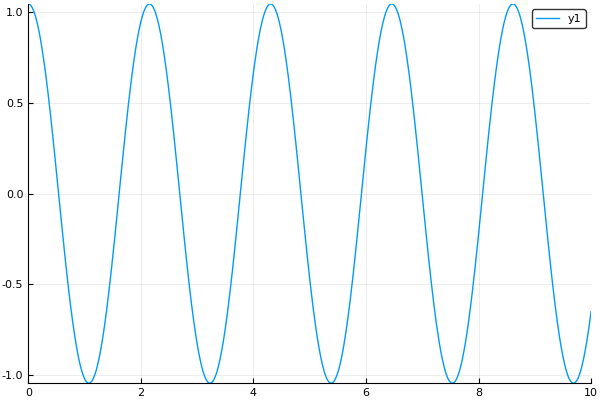

In [5]:
g = 9.81
L = 1.0

f(t, Y) = [Y[2], -g/L * sin(Y[1])]

T = linspace(0, 10, 1001)
y_values = approximate_Y(T, [pi/3, 0], f)
plot(T, y_values)